# Analyze Bike Sharing Company Data using Linear Regression

## 1. Import Data and perform EDA on the imported data

In [280]:
#Supress common unwanted warnings
import warnings
warnings.filterwarnings ('ignore')

In [281]:
#Import the numpy and pandas packages required for data analysis
import numpy as np
import pandas as pd
pd.set_option ('display.max_columns',50)

In [282]:
#Import the packages required for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
#import the packages required for splitting dataset into test and train dataset and for data normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [344]:
# Importing packages required for RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from statsmodels.graphics.gofplots import ProbPlot

In [343]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
#Import CSV into a dataframe
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [287]:
#Validate if all columns and rows are imported successfully from the CSV file
bike.shape

(730, 16)

We seem to have 730 unique rows and 16 columns.

In [288]:
#Let us now get details on each of the columns.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We seem to have 15 numeric columns. There is only 1 object column which may need to be dealt with later.

In [289]:
#Let us get more information on the numeric columns

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


All of the numeric colums seem to be in order with 730 values which matches our shape.

In [290]:
#Let us confirm this fact and make sure there are no null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [291]:
#All of the values are in order.
#We can now rename a few of the columns to improve readability.
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Since values in season, month, weathersit and weekday are all in numbers, it may become extremely comfusing once we convert these into features(as they are most likely categorical. For this reason, let us translate these values into a more understandable format)

In [292]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [293]:
#Out of the 16 columns available for us, let us classify them into vategorical and continuous variables
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

By looking at the above values we can conclude that:
The first 7 columns are categorical variables.
The rest of the columns have too many values to be called as categorical. Hence these can be thought of as continuous variables.

We may not need all 16 columns/variables for our linear regression model. Understanding the variables and analyzing them can be considered as a good first step.

Let us start this analysis by first looking at the categorical variables.

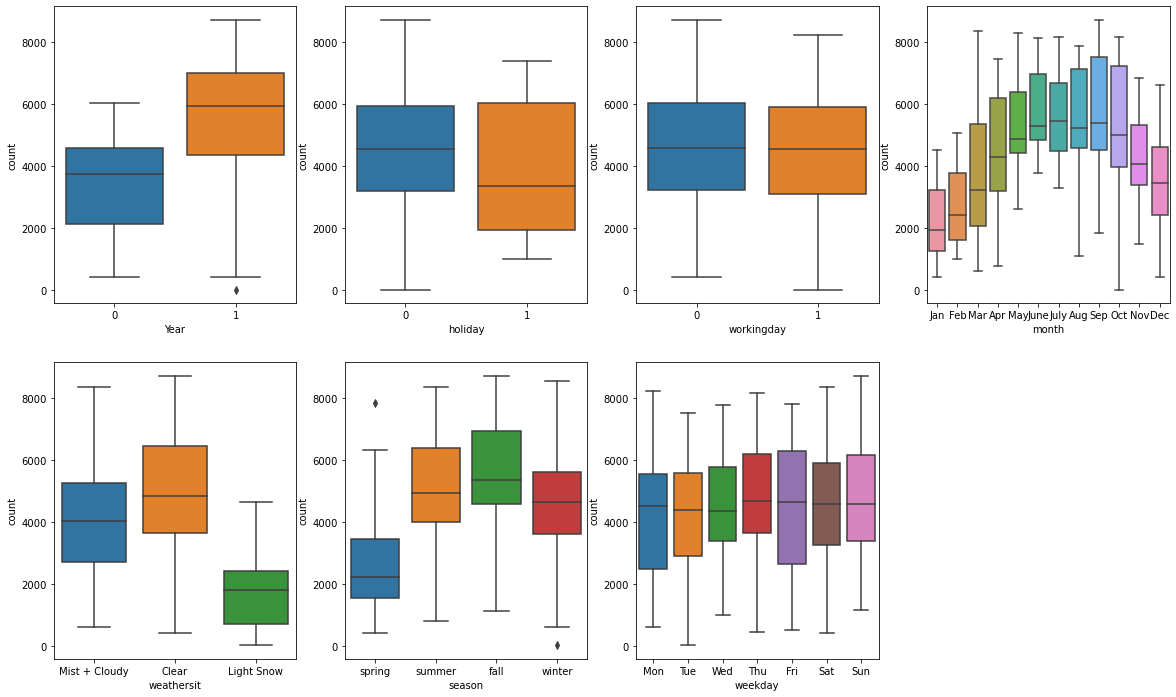

In [294]:
##Creating boxplots for the identified categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.show()

The aim of this analysis is to understand the factors affecting revenue. Revenue is a direct consequence of customers renting the bikes. Hence, we can treat count as the target variable which we are trying to predict.
Plotting the features against the target variable and by looking at the box plots, we can state the following facts.

1. Year 1 had a lot more Bike rentals as compared to year 0.
2. Bike Rentals are highest during season 3 and least in season 1
3. Bike Rentals are more in weather situation 1. They are least in weather situation 3.
4. Bike Rentals are more on days 0, 4 and 5.

Let us now analyze the numeric continuous variables.

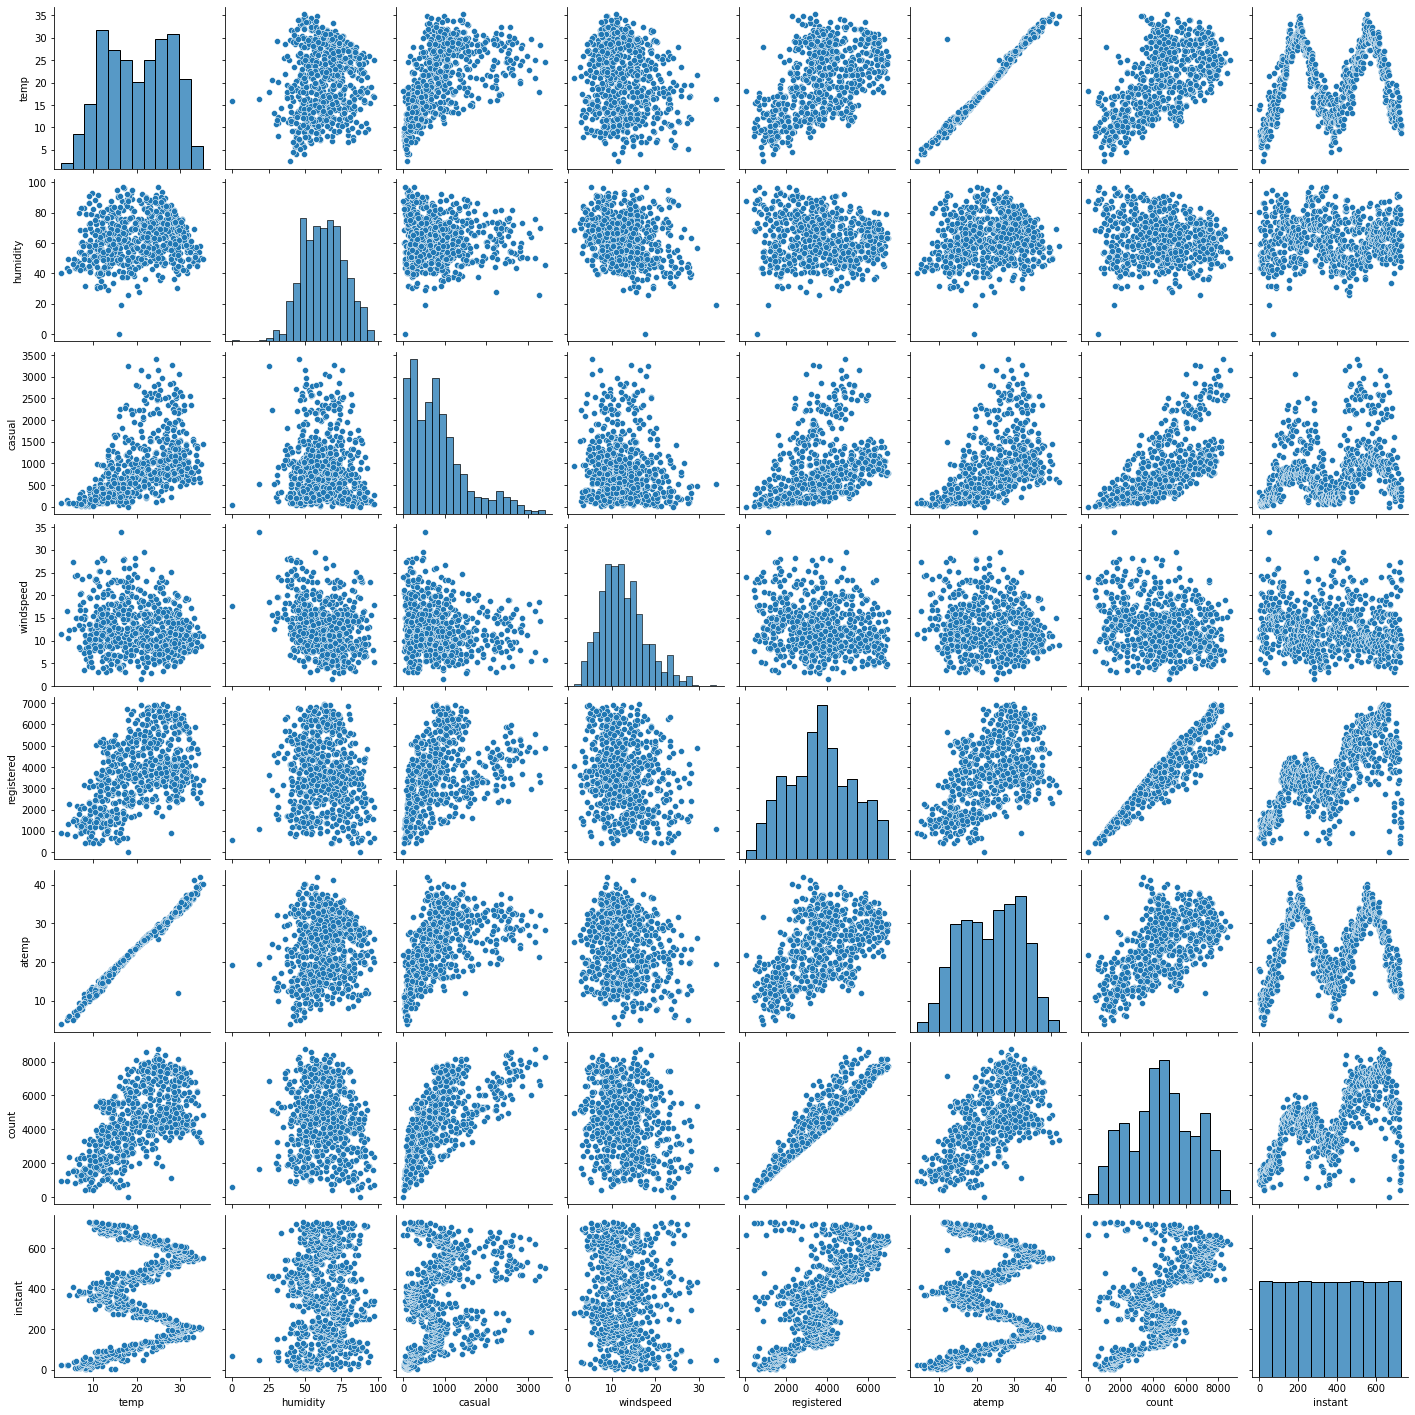

In [295]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

As we can see above, we can conclude that some of the independent variables are positively correlated to the count variables.
We can also see very clear correlation among certain other variables which may lead to collinearity. We will address this later. Let us explore further using a heatmap

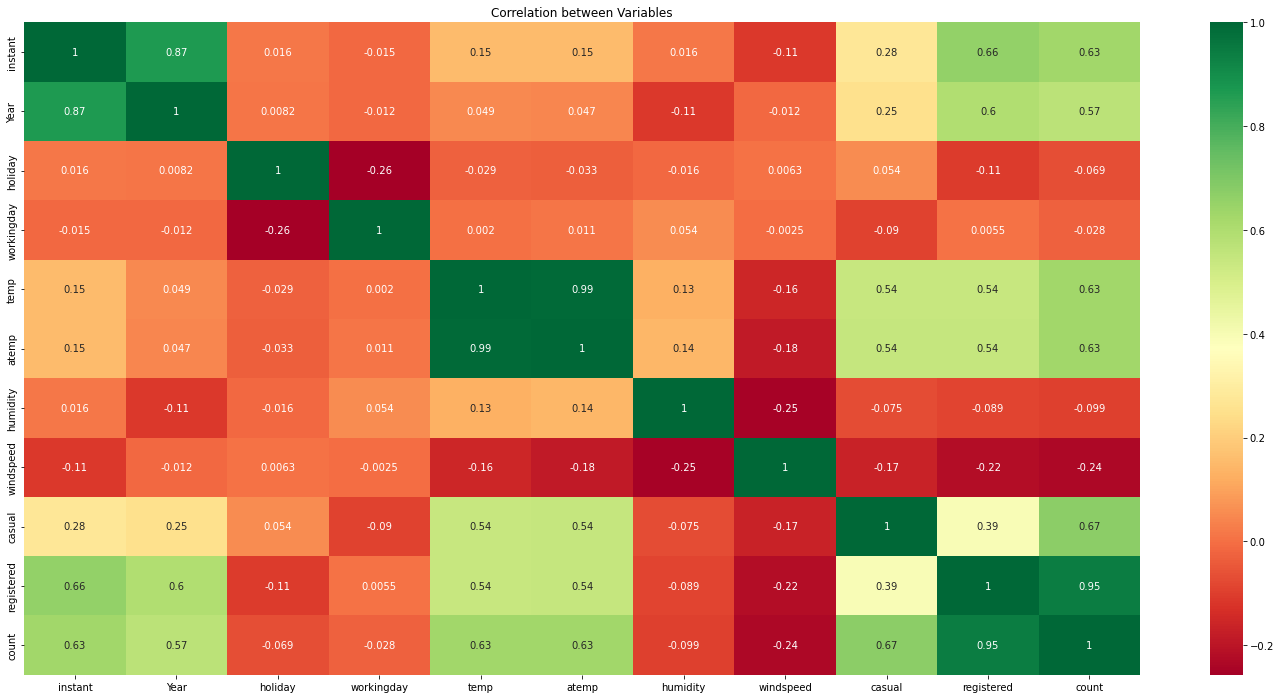

In [296]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

Looking at above analysis, we can see that instant, Year, temp, atemp, casual and registered seem to have the most correlation with count
We now have a good idea of the data that we have in hand and the positive correlation proves we can use linear regression to predict the count.

Let us analyse a few variables further

In [297]:
print('Casual + Registered =', sum(bike.casual)+sum(bike.registered))
print('Count =', sum(bike['count']))

Casual + Registered = 3290845
Count = 3290845


It seems like Casual and Registered together make up the count variable which is our target. We also have index which just seems to be a primary key. These three columns can be dropped just after the first glance. We can also drop the only other non-numeric column 'dteday' since trends can only be analyzed at a more macro level. Let us drop these three columns. Also, correlation between temp and atemp is too high for both the columns to be significant. Let us grop atemp as well

In [298]:
#drop unwanted columns
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Step 2: Data Preperation

Let us start by creating dummy variables for the categorical columns that we identified earlier

In [299]:
# # Create dummy variables for weekdays, month, season, weathersit

weekdays=pd.get_dummies(bike.weekday,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [300]:
# Adding the new columns back to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [301]:
# Drop the original columns as we have created the dummies for them
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [302]:
#Verify the total number of columns currently in the data frame
bike.shape

(730, 29)

## Step 3: Separating Training Data and Test Data

Before we can proceed further, we need to split the dataset into training data on which model will be trained and test data on which we will be testing the model.

In [303]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

We are now all set with the categorical variables. To make the model easier to read, let us now re-scale the continuous variables.I will be using the MinMax scaler to normalize the data.

In [304]:
#Normalizing the continuous variables
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [305]:
#Confirm if Normalization went ahead as expected
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As a last step, let us divide datasets into X and y for model building

In [306]:
#Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train

## Step 4: Build Model

I will be using a hybrid approach for feature selection. I will first be running the dataset through RFE to retain just 15 features. If required I will then remove additional features to simplify the model.

In [307]:
# Running RFE to shortlist 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [308]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [309]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

### Build Model 1

In [310]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

In [311]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

In [312]:
# Building the linear model 
lm1 = sm.OLS(y_train,X_train_1).fit()

In [313]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        22:42:02   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [314]:
#Check VIF
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,82.52
8,spring,5.27
13,temp,4.42
10,winter,3.83
9,summer,2.77
14,humidity,1.92
4,Nov,1.77
2,Jan,1.68
7,Mist + Cloudy,1.57
1,Dec,1.50


November is not significant considering the high p-value and also has high multicollinearity. This can be dropped

In [315]:
X_train_2 = X_train_1.drop(["Nov"], axis = 1)
X_train_2 = sm.add_constant(X_train_2)
lm2 = sm.OLS(y_train,X_train_2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          4.71e-189
Time:                        22:42:04   Log-Likelihood:                 512.01
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     495   BIC:                            -930.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3036      0.035      8.590

In [316]:
#Check VIF
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.66
7,spring,5.10
12,temp,4.14
9,winter,3.59
8,summer,2.69
13,humidity,1.92
2,Jan,1.65
6,Mist + Cloudy,1.56
3,July,1.49
4,Sep,1.31


December is not significant considering the high p-value. This can be dropped

In [317]:
X_train_3 = X_train_2.drop(["Dec"], axis = 1)
X_train_3 = sm.add_constant(X_train_3)
lm3 = sm.OLS(y_train,X_train_3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          7.59e-190
Time:                        22:42:05   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483

In [318]:
#Check VIF
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.76
6,spring,5.08
11,temp,3.89
8,winter,3.59
7,summer,2.65
12,humidity,1.90
1,Jan,1.57
5,Mist + Cloudy,1.56
2,July,1.49
3,Sep,1.30


Spring has both a low pvalue(insignificant) and high VIF(collinearity). This can be dropped

In [319]:
X_train_4 = X_train_3.drop(["spring"], axis = 1)
X_train_4 = sm.add_constant(X_train_4)
lm4 = sm.OLS(y_train,X_train_4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.04e-189
Time:                        22:42:08   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2449      0.028      8.677

In [320]:
#Check VIF
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
10,temp,2.06
11,humidity,1.88
1,Jan,1.55
5,Mist + Cloudy,1.55
7,winter,1.53
2,July,1.43
6,summer,1.41
4,Light Snow,1.24
3,Sep,1.19


Jan has extremely high collinearity. Let us drop Jan.

In [321]:
X_train_5 = X_train_4.drop(["Jan"], axis = 1)
X_train_5 = sm.add_constant(X_train_5)
lm5 = sm.OLS(y_train,X_train_5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          6.89e-190
Time:                        22:42:13   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2262      0.027      8.384

In [322]:
#Check VIF
vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
10,humidity,1.87
9,temp,1.60
4,Mist + Cloudy,1.55
1,July,1.43
5,summer,1.33
6,winter,1.29
3,Light Snow,1.24
2,Sep,1.19
11,windspeed,1.18


In our final model(lm5),  we see that:
1. The p-values for all our remaining features are less than 0.05 which mean they contribute significant information
2. VIF values for all of the features are less than 5, which means we do not have multicollinearity (Features being strongly affected by other features)
3. R-Squared measure is 0.84 and adjusted R-Squared is at 0.836. These are good numbers and hence we can conclude that model 5 is a good one.

## Step 5 - Residual Analysis of Train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [323]:
y_train_pred = lm5.predict(X_train_5)

<Figure size 432x288 with 0 Axes>

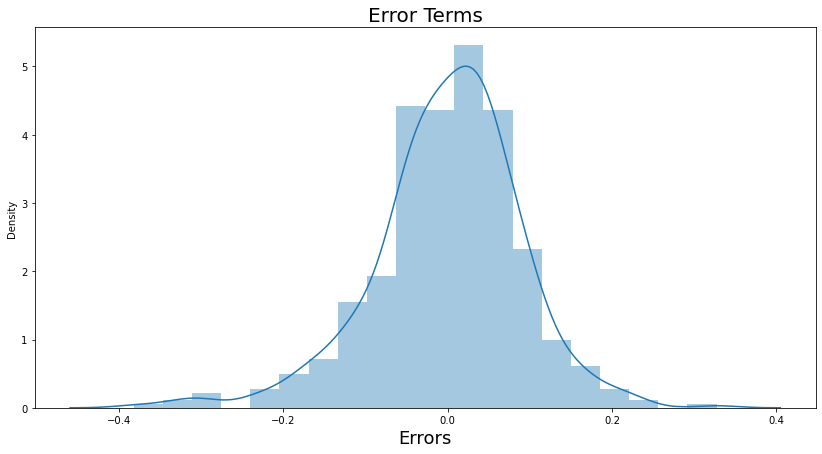

In [324]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see that the Error terms are normally distributed and are centered around 0. Hence, this can be a viable model.
Let us analyze further by plotting our residuals against fitted values.

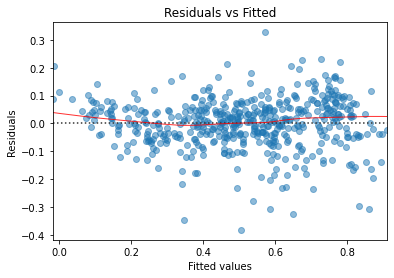

In [345]:
#Residuals vs fitted
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_train_5.drop(['const'], axis = 1,inplace = False), y_train], axis=1)
# model values
model_fitted_y = lm5.fittedvalues
# model residuals
model_residuals = lm5.resid
# normalized residuals
model_norm_residuals = lm5.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lm5.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lm5.get_influence().cooks_distance[0]

plot3_lm5 = plt.figure()
plot3_lm5.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot3_lm5.axes[0].set_title('Residuals vs Fitted')
plot3_lm5.axes[0].set_xlabel('Fitted values')
plot3_lm5.axes[0].set_ylabel('Residuals');

Any lack of obvious patterns above indicate that there are no major red flags in the model. Let us analyze further by plotting a Q Q Plot

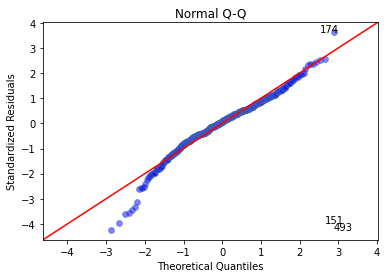

In [346]:
##### Plotting a Normal Q-Q plot

QQ = ProbPlot(model_norm_residuals)
plot4_lm5 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot4_lm5.axes[0].set_title('Normal Q-Q')
plot4_lm5.axes[0].set_xlabel('Theoretical Quantiles')
plot4_lm5.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot4_lm5.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

All data points lie fairly close to the red line. This indicates that we have a good model

## Step 6 - Predict Count using the regression model

Normalizing test values. 

In [325]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


Divide test data into X test and y test

In [326]:
y_test = bike_test.pop('count')
X_test = bike_test

Only keep the columns which are in the training dataset during used during model training

In [334]:
X_train_use = X_train_5.drop("const", axis=1, inplace=False)
X_test_1 = X_test[X_train_use.columns]

In [336]:
# Adding a constant variable 
X_test_1 = sm.add_constant(X_test_1)
X_test_1.head()

,const,July,Sep,Light Snow,Mist + Cloudy,summer,winter,Year,holiday,temp,humidity,windspeed
184,1.0,1,0,0,1,0,0,0,1,0.831783,0.657364,0.084219
535,1.0,0,0,0,0,1,0,1,0,0.901354,0.610133,0.153728
299,1.0,0,0,0,1,0,1,0,0,0.511964,0.837699,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.437098,0.339570
152,1.0,0,0,0,0,1,0,0,0,0.817246,0.314298,0.537414


In [339]:
# Making predictions
y_pred = lm5.predict(X_test_1)
r2_score(y_test,y_pred)

0.8050021066128354

## Step 7 Model Evaluation

Text(0, 0.5, 'y_pred')

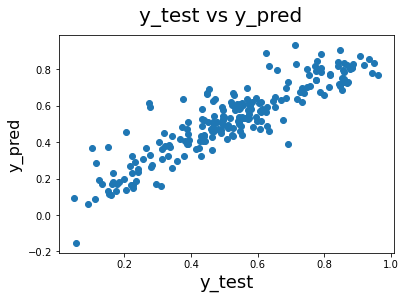

In [341]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

As y test increases, y pred also increases, i.e. they show the same trend. This is as per our expectation of our model

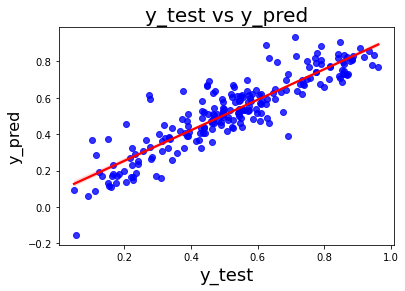

In [342]:
#Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Final Result Comparision between Train and Test:

- Train R^2      - 0.840
- Train Adj. R^2 - 0.836
- Test R^2       - 0.805
- Difference between Train and test R^2 is ~ 3.5% which is less than 5% and is satisfactory

## Model interpretation in terms of Business Goals

1. Summer and Winter seem to be the best performing seasons. 
2. Temparature has a very high co-efficient of 0.6. So people are generally looking to cycle more as it gets hotter and the company may plan to leverage this fact.
3. There are certain negetive co-efficients. This means as the independent variable increases, the dependent variable tends to decrease. Increase in Light snow, mist+cloud and higher windspeeds seem to decrease the number of bike rentals. Hence promotions/offers during these events may benifit the company.
4. The month of july and holidays also seem to negetively co-relate to the count of rentals. Business may keep this in mind as well for their marketting strategy planning.

